In this notebook, I test my MCMC fitting. 

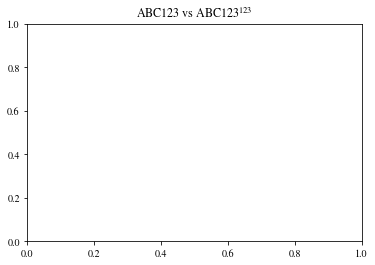

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os,sys
sys.path.append(os.path.abspath('../'))
import global_signal_black_holes_mcmc as GSBH_MCMC
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

In [6]:
reload(GSBH_MCMC)
sampler=GSBH_MCMC.Sampler('analytic_test.yaml')

AttributeError: 'module' object has no attribute 'fft_convolve'

In [7]:
np.loadtxt('bowman_2018_data.csv',skiprows=1,delimiter=',')

IOError: [Errno 2] No such file or directory: 'bowman_2018_data.csv'